# The ai-models utility

_By: Luke Madaus -- 24 Oct 2024 -- madaus@wisc.edu / luke.madaus@rwe.com_

The European Centre for Medium-Range Weather Forecasts (ECMWF) is a leader in the evaluation, development and adoption of AI-based weather models.  To help them evaluate different AI weather models, they developed a set of wrapper utilities that allow you to run different AI weather models using a common command-line interface.  It's python code under the hood, but you can run it from a terminal on your computer.

The main page for this wrapper utility (ai-models) is here:
https://github.com/ecmwf-lab/ai-models


As of 22 October 2024, the following models are supported (though not all are listed on that page):

| **Name of model** | **ai-models plugin** | **Description** | **Runnable on Laptop?** | **Other notes** |
|:-----------------:|:--------------------:|:----------------|:-----------------------:|:----------------|
| PanguWeather | `ai-models-panguweather` | Huawei's AI weather model | Yes | Uses ONNX runtime |
| FourCastNet | `ai-models-fourcastnet` | Older version of NVIDIA's model that does not use spherical harmonics. | Yes | |
| FourCastNetv2 | `ai-models-fourcastnetv2` | Newer version of NVIDIA's model that uses Spherical Fourier Neural Operators (SNFO) | Yes | Is called `fourcastnetv2-small` when running the utility |
| GraphCast | `ai-models-graphcast` | Google DeepMind model using graph neural networks | Needs a computer with A100 or higher GPU to run | ECMWF's own AIFS model uses a similar architecture; need to follow special installation instructions to install JAX |
| Aurora | `ai-models-aurora` | Microsoft model using transformers | Yes | |
| FuXi | `ai-models-fuxi` | Fudan University model | Yes | Uses ONNX runtime |


## Note on licensing
The majority of these models (except for the FourCastNet models) have non-commercial licenses attached to the pre-trained model weights.  This means you cannot use these models to, say, sell forecasts on a website.  But they do allow use for academic research and personal interest.


## Installing ai-models

For any ai-model you want to use, you need to install two things:
- The core `ai-models` utility
- The model-specific plugin for the model you want to run.


In [1]:
# Install the ai-models package using pip
!pip install ai-models

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached cfgrib-0.9.14.1-py3-none-any.whl.metadata (55 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.5 MB/s eta 0:00:00 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached findlibs-0.0.5-py3-none-any.whl
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached pyproj-3.7.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (31 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cache

In [2]:
# Now install the plugin for fourcastnetv2
!pip install ai-models-fourcastnetv2

  Preparing metadata (setup.py) ... done
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 MB 44.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.5 MB/s eta 0:00:00
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Created wheel for ai-models-fourcastnetv2: filename=ai_models_fourcastnetv2-0.0.3-py3-none-any.whl size=24334 sha256=b7a2b7f94b9ee04a7067441e23709668f1323cba0b6eb71a8dba00547e4f1a95
  Stored in directory: /Users/lmadaus/Library/Caches/pip/wheels/37/d5/fb/85b2cc80edaa40727012154cb86489fe79969b4530b4fc3502
Successfully built ai-models-fourcastnetv2


In [1]:
# for visualization we also want to install xarray, cfgrib, matplotlib and cartopy
!pip install xarray cfgrib matplotlib cartopy

## Downloading the model weights
By installing the software plugin for a model, you just have the code needed to set up and run the model.  But the model itself (i.e., the model weights) still need to be downloaded.  The `ai-models` utility can be run with the `--download-assets` flag to download the model weights.  You only need to do this once; the same weights will be used every time you want to make a forecast with a model.

Note that the model weight files for many of these models can be multiple gigabytes in size, so be prepared for a more significant downlod.

In [3]:
# Download the model weights for fourcastnet-v2 (called fourcastnetv2-small in the code)
!ai-models --download-assets fourcastnetv2-small

2024-10-22 15:19:31,657 INFO Writing results to fourcastnetv2-small.grib
2024-10-22 15:19:31,657 INFO Downloading /Users/lmadaus/Notebooks/ai_model_basics/weights.tar
2024-10-22 15:19:31,658 INFO Downloading https://get.ecmwf.int/repository/test-data/ai-models/fourcastnetv2/small/weights.tar
weights.tar:   3%|▋                        | 83.0M/3.22G [01:36<40:07, 1.40MB/s]^C
2024-10-22 15:21:09,937 INFO Total time: 1 minute 49 seconds.                   
Traceback (most recent call last):
  File "/Users/lmadaus/miniforge3/envs/amb/bin/ai-models", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/ai_models/__main__.py", line 362, in main
    _main(sys.argv[1:])
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/ai_models/__main__.py", line 310, in _main
    run(vars(args), unknownargs)
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/ai_models/__main__.py", line 3

## Running a forecast

One of the nicest features of the `ai-models` wrapper is that it automates the downloading and pre-processing of the initial conditions files you need to make a forecast starting from any historical date.  It offers many possible sources for obtaining initial conditions but the easiest to use is the `ecwmf-open-data` option.  This uses ECWMF initial conditions (going back two months or so) or ERA5 reanalysis initial conditions (anything from two months ago back to 1940 as starting dates) stored on their cloud platform.

The command for running a forecast using the analysis at 12Z yesterday (default) (assuming you've already installed the plugin for this model and downloaded the model weights) follows this template:

`ai-models --input ecmwf-open-data --lead-time {forecast length in hours} {model name here}`

If you want to start a forecast from an historical time you can also add the flags: `--date {YYYYMMDD} --time {HH}` to specify a particular initialization time. 

In [5]:
# do a 10-day forecast with the most recent initial conditions available on ecmwf-open-data
!ai-models --input ecmwf-open-data --lead-time 240 fourcastnetv2-small

2024-10-22 15:34:06,351 INFO Writing results to fourcastnetv2-small.grib
2024-10-22 15:34:06,352 INFO Loading ./global_means.npy
2024-10-22 15:34:06,360 INFO Loading ./global_stds.npy
2024-10-22 15:34:06,369 INFO Loading surface fields from OPENDATA
2024-10-22 15:34:08,956 INFO Downloading <multiple>
2024-10-22 15:34:16,438 INFO Loading pressure fields from OPENDATA              
2024-10-22 15:34:16,438 WARNING Parameter 'z' on pressure levels is not available in ECMWF open data, using 'gh' instead
2024-10-22 15:34:16,438 INFO ecmwf-open-data {'date': 20241021, 'time': 12, 'param': ['t', 'u', 'v', 'r', 'gh'], 'step': 0, 'levelist': [1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50], 'resol': '0p25', 'levtype': 'pl'}
2024-10-22 15:34:24,330 INFO Downloading <multiple>
2024-10-22 15:35:06,863 INFO Using device 'MPS'. The speed of inference depends greatly on the device.
/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/ai_models_fourcastnetv2/model.py:146: Fu

## Looking at the output

The output file from the forecast is written as `fourcastnetv2-small.grib`.  

This is probably the least-nice part of using ai-models: the output is written in grib format, which is not the easiest to read in python.  But, using the cfgrib library extension we can indeed do it...

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
proj = cartopy.crs.PlateCarree()

In [15]:
# This convoluted opening sequence lets you see variables encoded at 2m, 10m and 100m above the ground in the same dataset
# IGNORE THE ERROR MESSAGES
dsets = []

# Load 2m temperature
dset_2m = xr.open_dataset('output/fourcastnetv2-small.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel':'heightAboveGround', 'level':2}})
del dset_2m.coords['heightAboveGround']
dsets.append(dset_2m)

# Load 100m winds
dset_100m = xr.open_dataset('output/fourcastnetv2-small.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel':'heightAboveGround', 'level':100}})
del dset_100m.coords['heightAboveGround']
dsets.append(dset_100m)

# Load full dataset
dset_full = xr.open_dataset('output/fourcastnetv2-small.grib', engine='cfgrib')
del dset_full.coords['heightAboveGround']
dsets.append(dset_full)

# Merge all
dset = xr.merge(dsets)
dset

Ignoring index file 'output/fourcastnetv2-small.grib.da267.idx' older than GRIB file
Ignoring index file 'output/fourcastnetv2-small.grib.da267.idx' older than GRIB file
Ignoring index file 'output/fourcastnetv2-small.grib.5b7b6.idx' older than GRIB file
skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/Users/lmadaus/miniforge3/envs/amb/lib/python3.11/site-packages/c

<xarray.Dataset> Size: 12GB
Dimensions:           (step: 41, latitude: 721, longitude: 1440,
                       isobaricInhPa: 13)
Coordinates:
    time              datetime64[ns] 8B 2024-10-23T12:00:00
  * step              (step) timedelta64[ns] 328B 0 days 00:00:00 ... 10 days...
  * latitude          (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude         (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time        (step) datetime64[ns] 328B 2024-10-23T12:00:00 ... 2024...
    surface           float64 8B ...
    meanSea           float64 8B ...
    entireAtmosphere  float64 8B ...
  * isobaricInhPa     (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
Data variables: (12/13)
    t2m               (step, latitude, longitude) float32 170MB ...
    u100              (step, latitude, longitude) float32 170MB ...
    v100              (step, latitude, longitude) float32 170MB ...
    u10               (step, latitude, longitude) float32 170MB ...
    v10               (step, latitude, longitude) float32 170MB ...
    sp                (step, latitude, longitude) float32 170MB ...
    ...                ...
    tcwv              (step, latitude, longitude) float32 170MB ...
    u                 (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    v                 (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    z                 (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    t                 (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    r                 (step, isobaricInhPa, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-24T15:21 GRIB to CDM+CF via cfgrib-0.9.1...

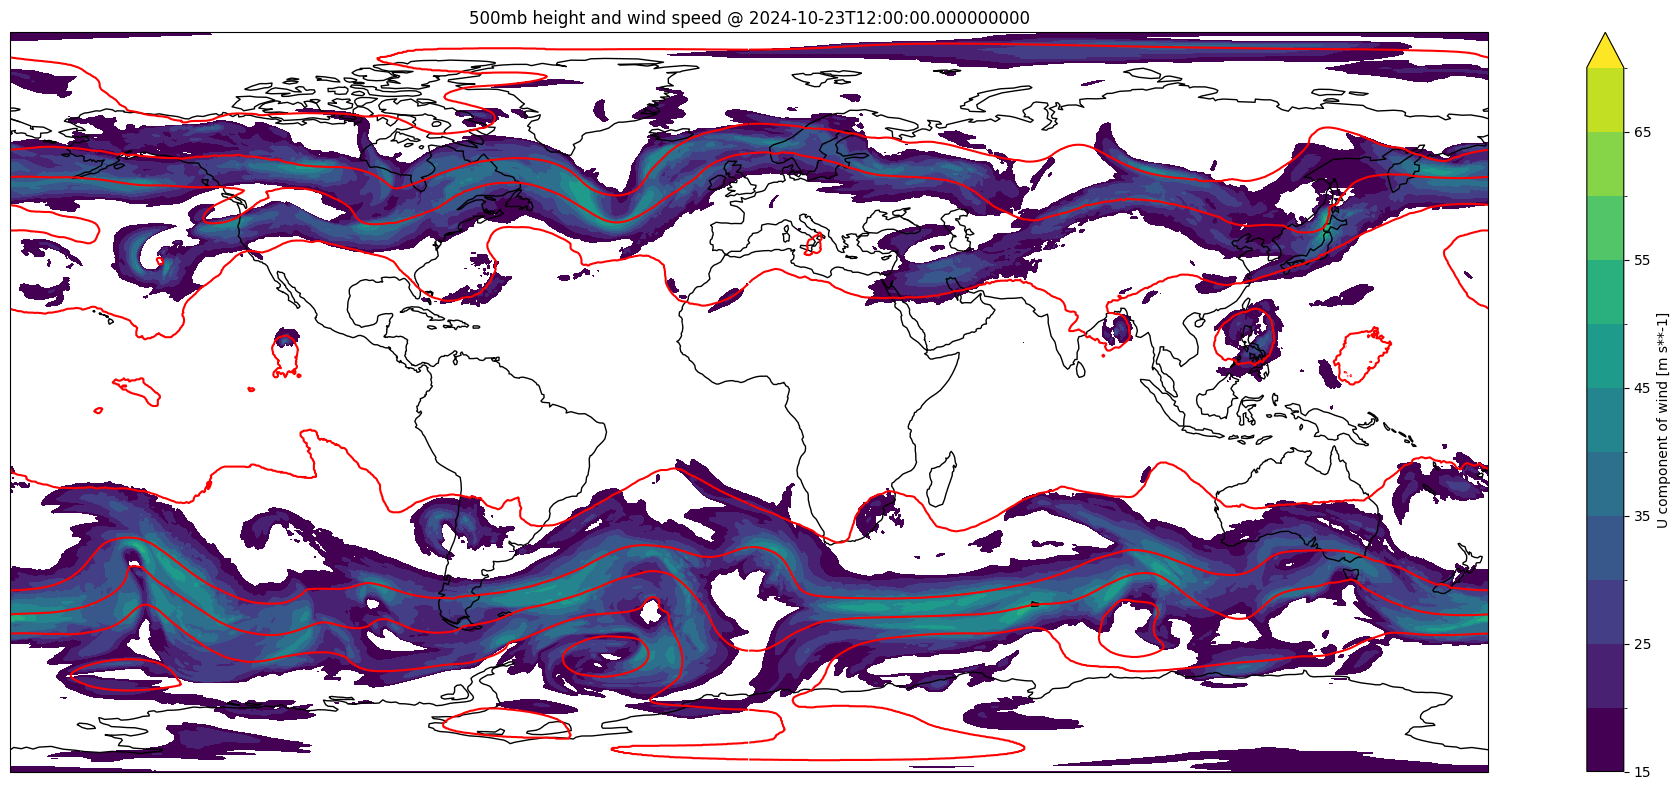

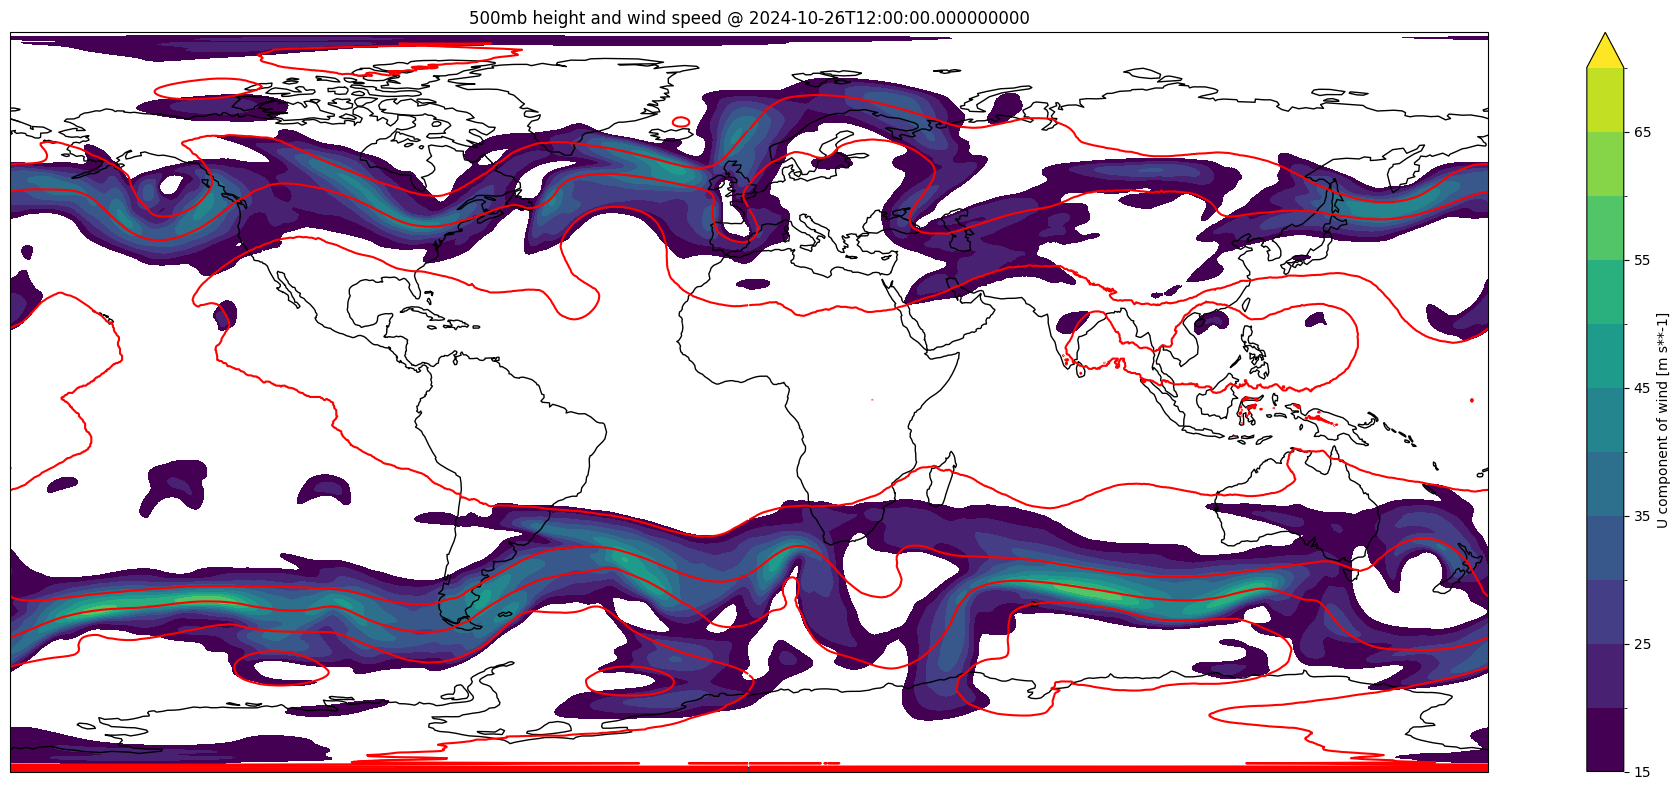

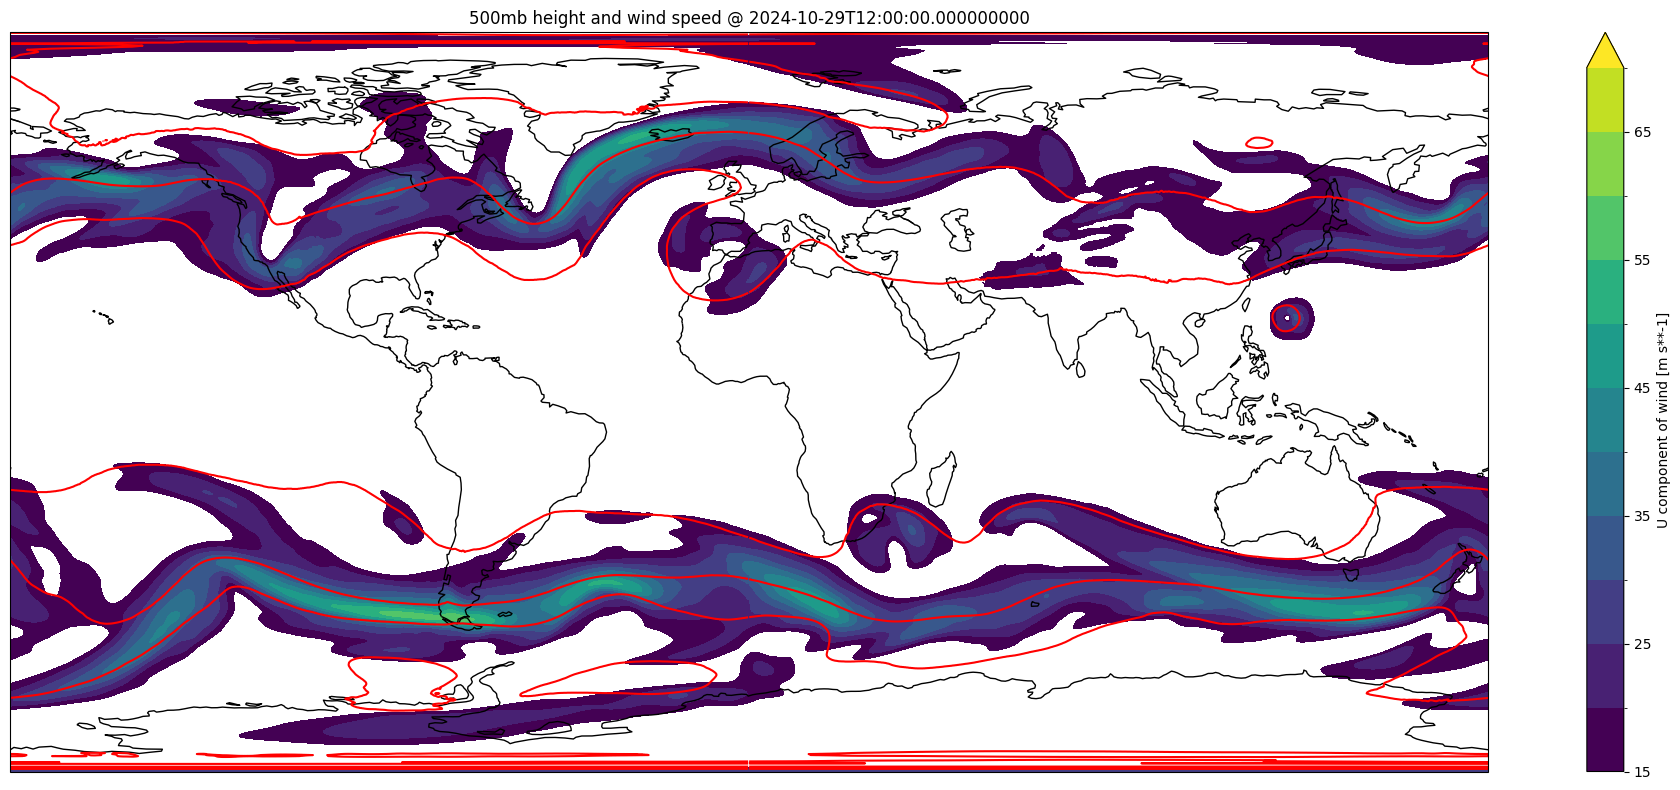

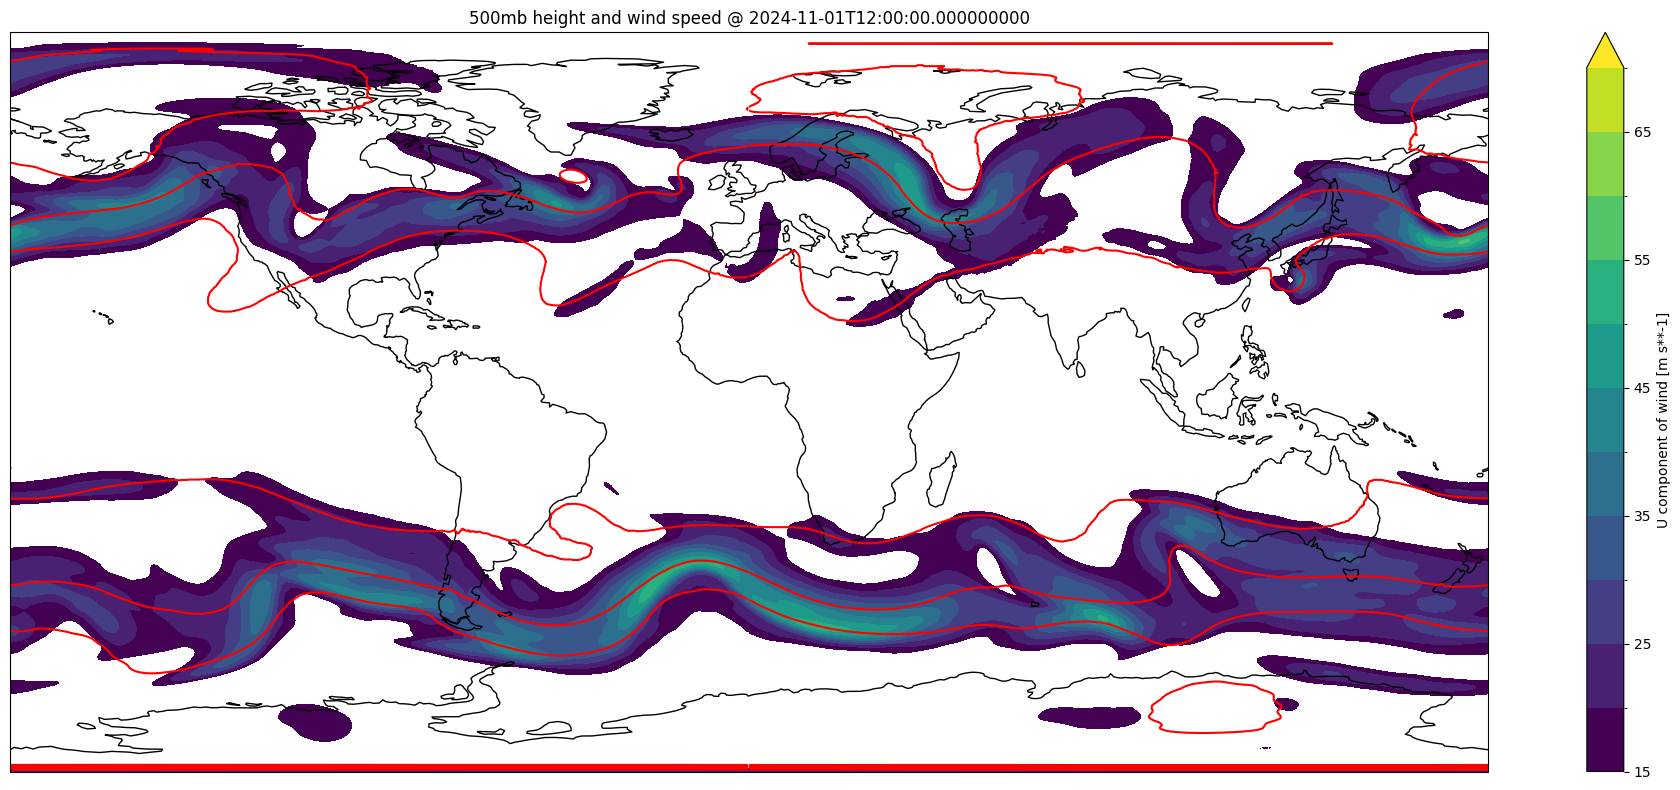

In [34]:
# Plot some maps of 500mb winds and height
use_times = dset.step[::12]

for step in use_times.values:
    valid_time = dset.time + step
    plt.figure(figsize=(20,8))
    ax = plt.subplot(1,1,1,projection=proj)
    this_time = dset.sel(step=step)
    # Get windspeed
    wspd = np.hypot(this_time['u'].sel(isobaricInhPa=500.0), this_time['v'].sel(isobaricInhPa=500.0))
    # Get geopotential height
    ght = this_time['z'].sel(isobaricInhPa=500.0)

    # Plot
    wspd.plot.contourf(ax=ax, levels=np.arange(15,75,5), extend='max')
    ght.plot.contour(ax=ax, colors='r')

    # Draw map
    ax.coastlines()
    ax.set_title(f'500mb height and wind speed @ {valid_time.values}')
    plt.tight_layout()
    plt.show()

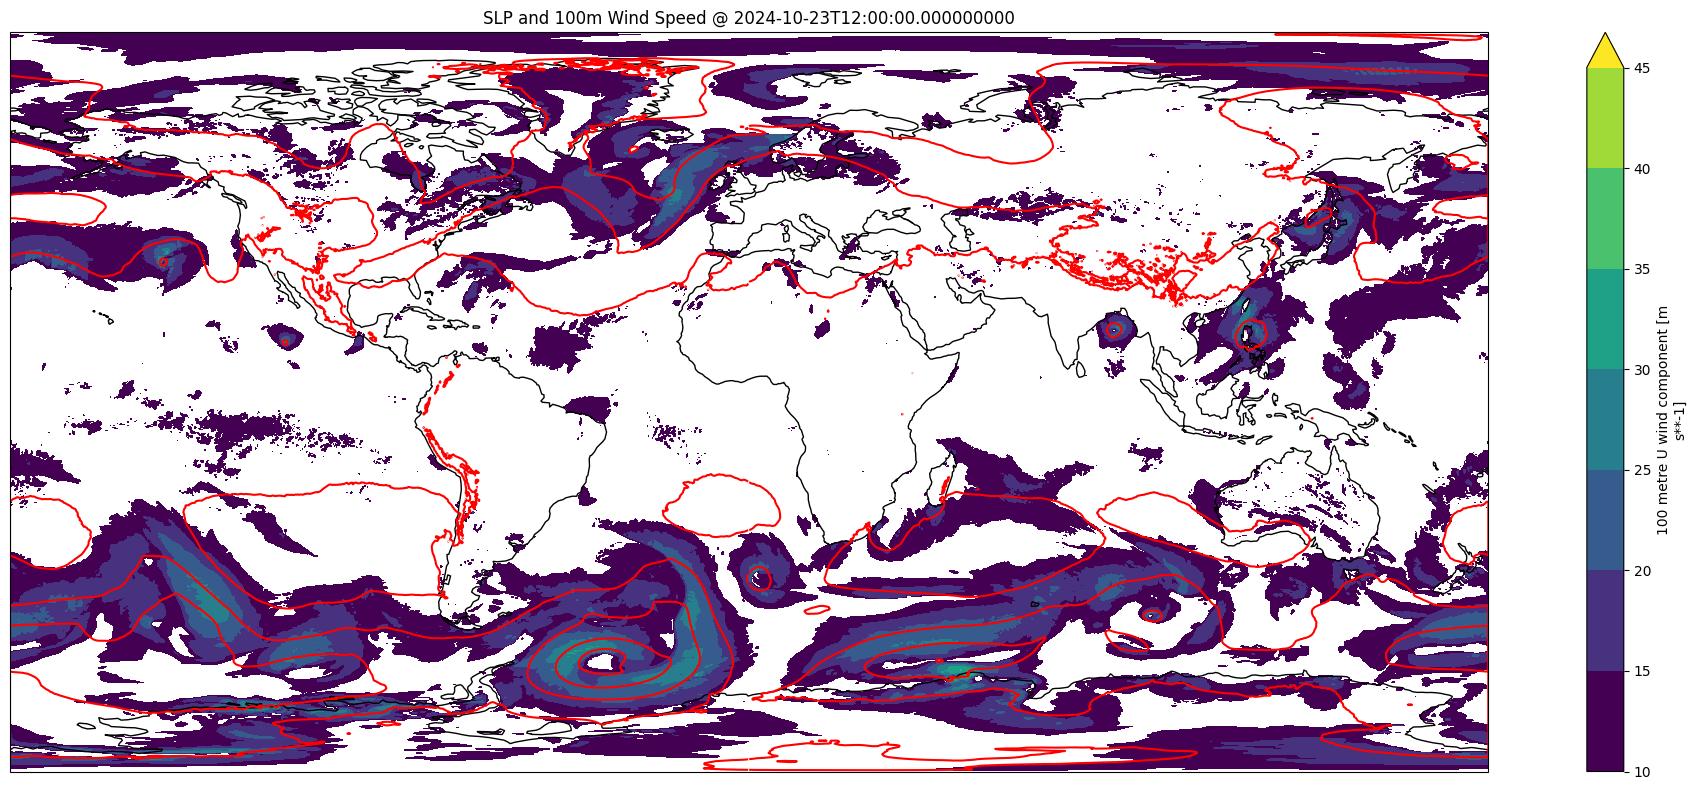

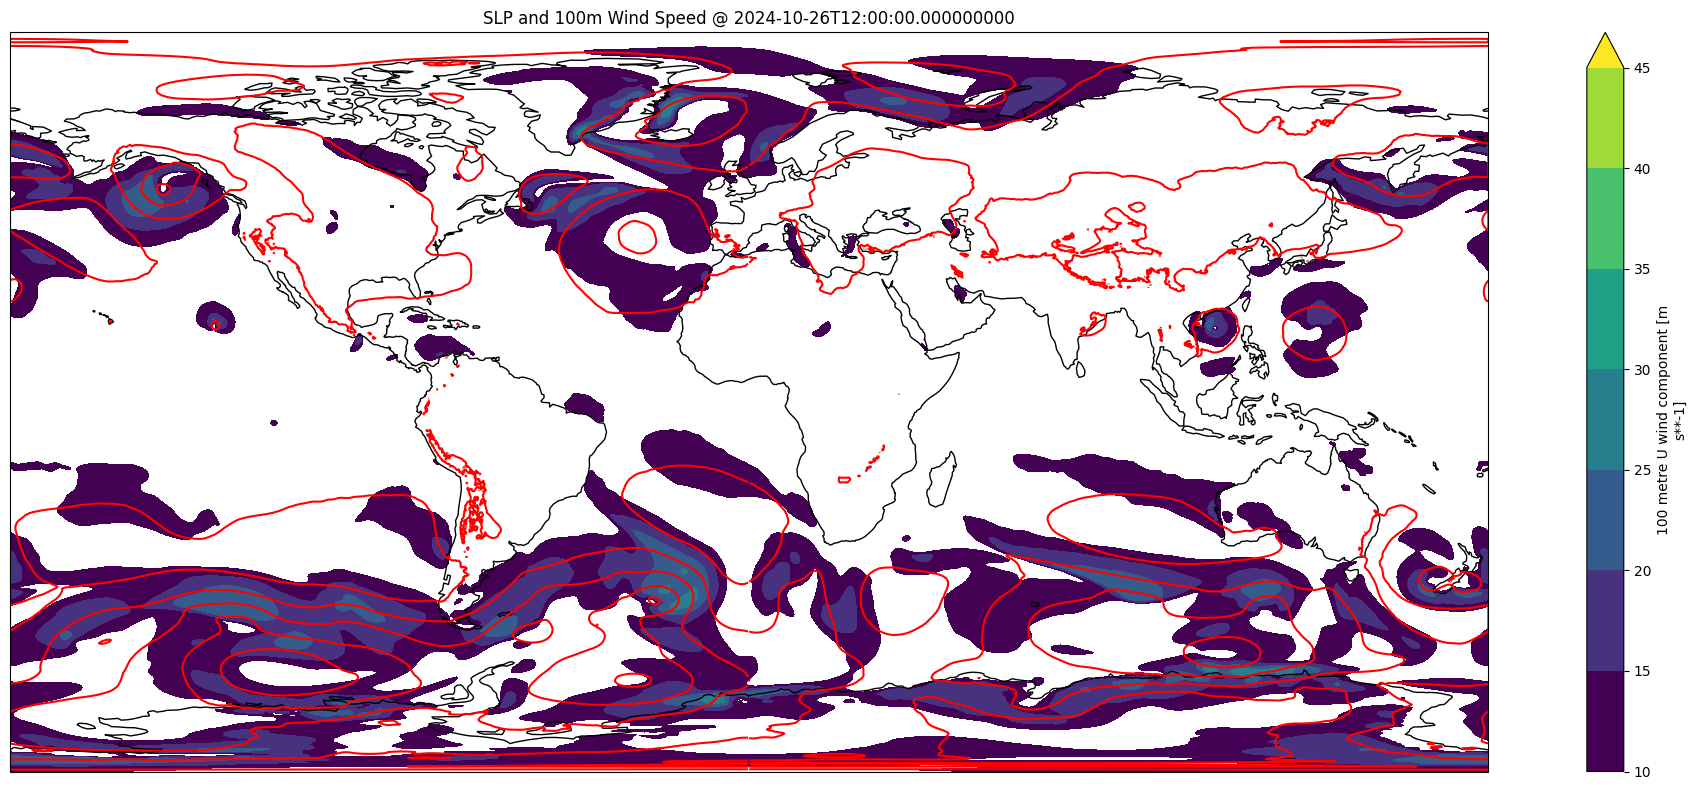

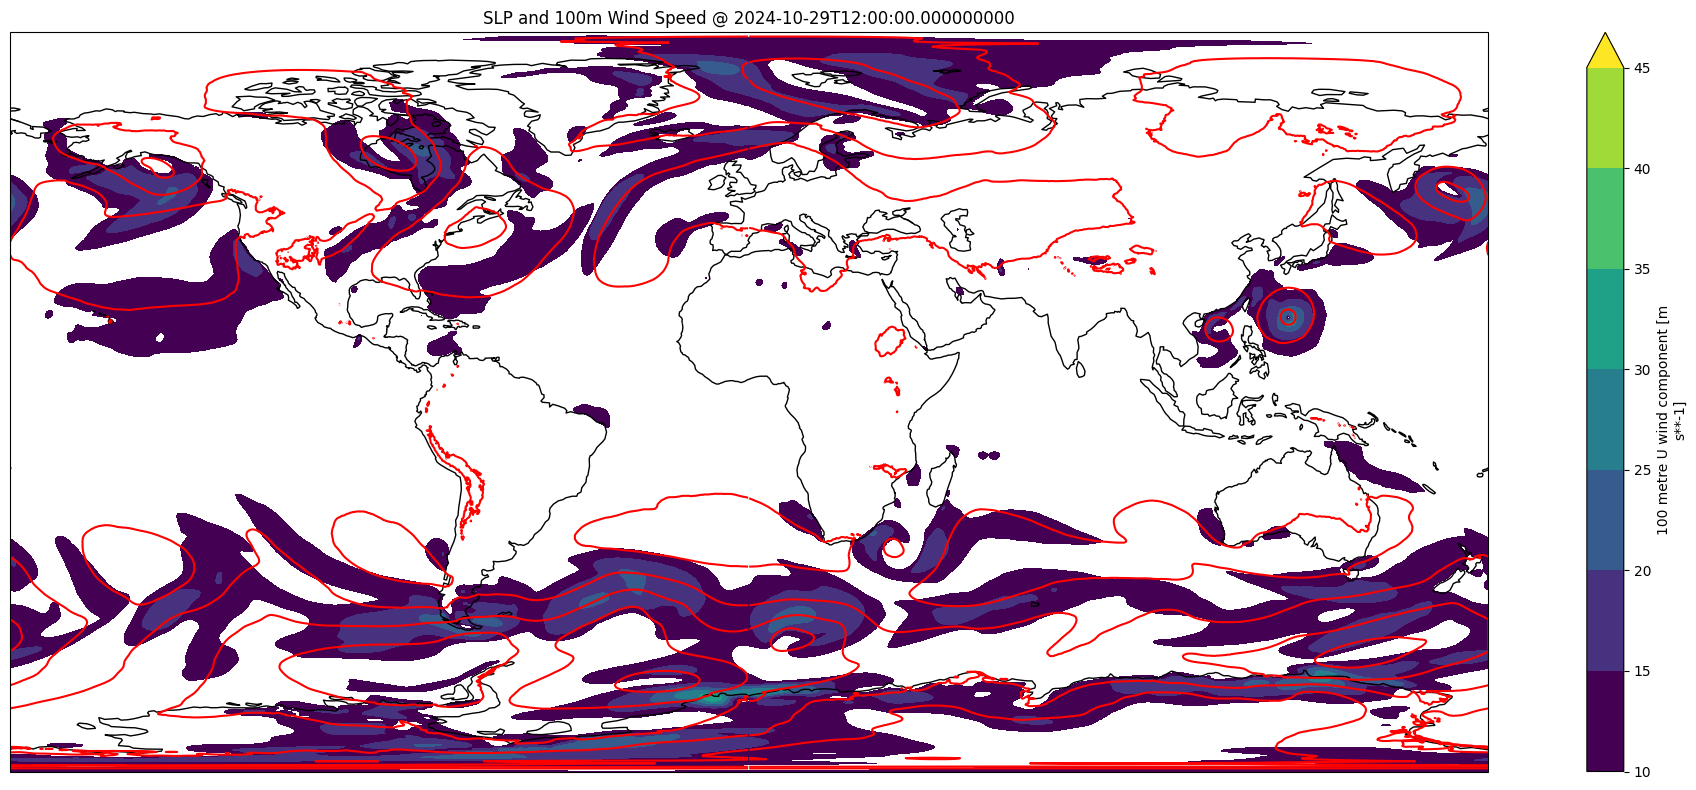

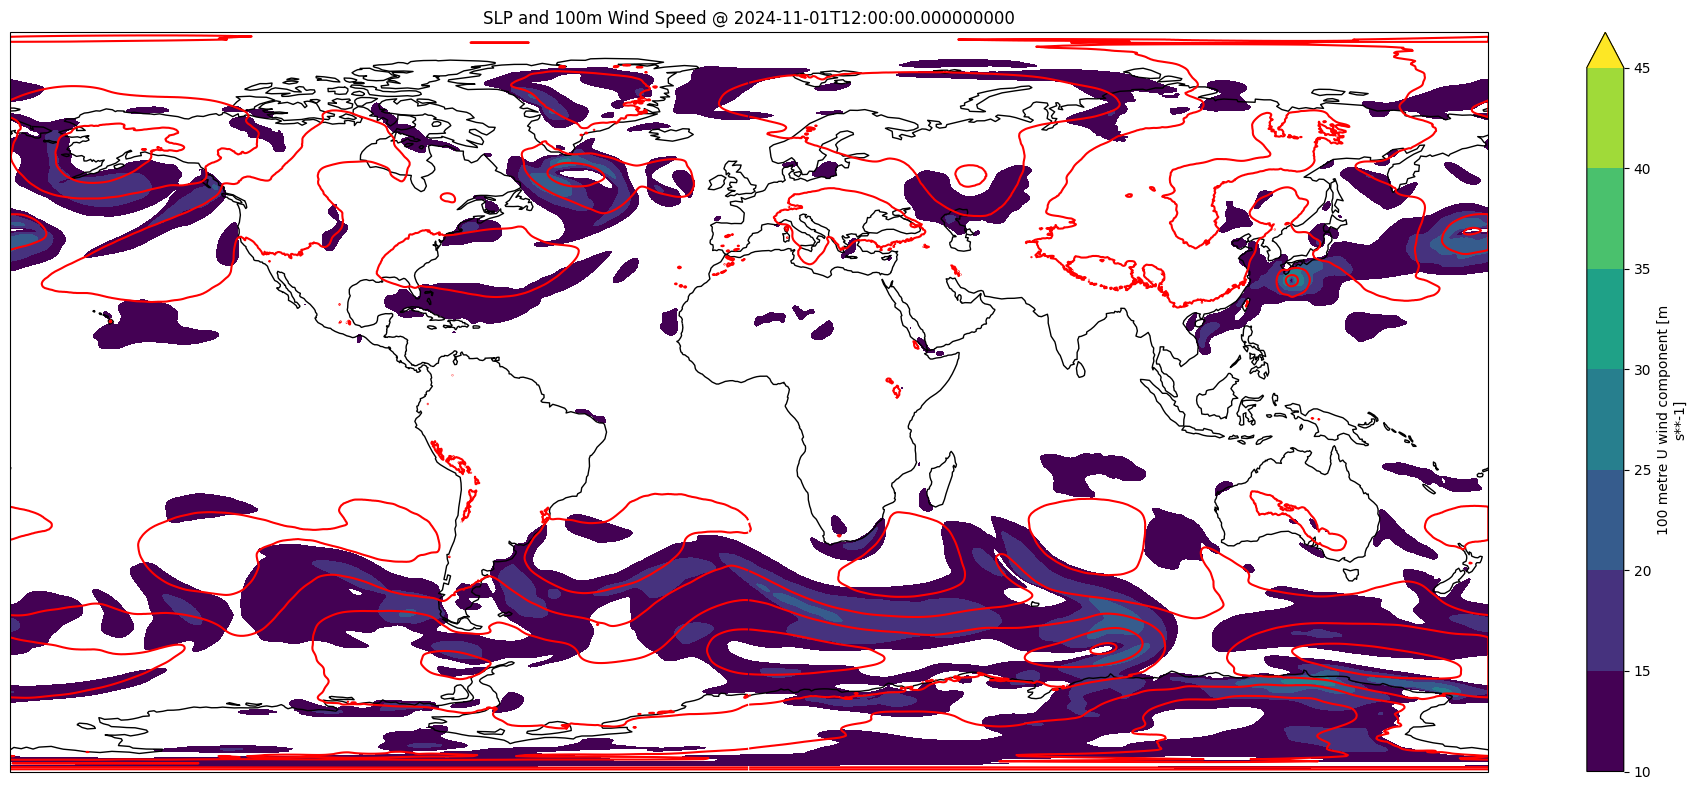

In [37]:
# Plot some maps of 100m winds and height
use_times = dset.step[::12]

for step in use_times.values:
    valid_time = dset.time + step
    plt.figure(figsize=(20,8))
    ax = plt.subplot(1,1,1,projection=proj)
    this_time = dset.sel(step=step)
    # Get windspeed
    wspd = np.hypot(this_time['u100'], this_time['v100'])
    # Get surface pressure
    msl = this_time['msl']

    # Plot
    wspd.plot.contourf(ax=ax, levels=np.arange(10,50,5), extend='max')
    msl.plot.contour(ax=ax, colors='r')

    # Draw map
    ax.coastlines()
    ax.set_title(f'SLP and 100m Wind Speed @ {valid_time.values}')
    plt.tight_layout()
    plt.show()